
# **Лабораторна робота №1**
# **МІТ-31**
# **Богдан Лапшин**

## **Init libraries**

In [16]:
import random as rnd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
def show(message, data):
    print(message,'\n', data, '\n')

def yhat(x, y):
    k, b = np.polyfit(x, y, 1)
    y_pred = k*x + b
    return y_pred


## **3авдання 1**

NumPy (створити набір даних (розмір за власним рішенням), провести CRUD операції над даними (скаляр, вектор, матриця)). Використати arange, random.


### Скаляр

In [23]:
array = np.arange(0, 19, 1)
show("Create and Read", array)

array = np.insert(array, 19, 19)
show("Update", array)

array = np.delete(array, 0)
show("Delete", array)

secondArray = np.random.randint(20, size=(array.size))
show("Using random", secondArray)


Create and Read 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] 

Update 
 [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 

Delete 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] 

Using random 
 [ 3  0  6  1 13 12  1 18 16  5 17 17  0  2  6  7  0  2 14] 



### Матриця

In [24]:
matrix = np.arange(16).reshape(4, 4)
show("Create and Read", matrix)

newrow = [19,19,19,19]
row_n = matrix.shape[0] ##last row
matrix = np.insert(matrix,row_n,[newrow],axis= 0)
matrix = np.arange(16).reshape(4, 4)
show("Update", matrix)

matrix = np.delete(matrix, 0, 0)
show("Delete", matrix)

Create and Read 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] 

Update 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] 

Delete 
 [[ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]] 



### Вектори

In [50]:
a = np.arange(0,15,3)
b = np.random.randint(19, size=5)
c = np.add(a, b)
d = np.subtract(a, b)

show("Add", "{}\n        + \n{}\n        =\n {}\n".format(a, b, c))
show("Subtract", "{}\n        -\n {} \n        =\n {}\n".format(a, b, d))

Add 
 [ 0  3  6  9 12]
        + 
[ 5  0 14 13  4]
        =
 [ 5  3 20 22 16]
 

Subtract 
 [ 0  3  6  9 12]
        -
 [ 5  0 14 13  4] 
        =
 [-5  3 -8 -4  8]
 




## **3авдання 2**

Pandas (створити dataframe різними способами, провести маніпуляції з даними (head, describe, iloc, loc ...))

In [56]:
data = pd.read_csv("customersData.csv")
data.head()

,Email,Address,Avatar,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [57]:
data.describe()

,Avg_Session_Length,Time_on_App,Time_on_Website,Length_of_Membership,Yearly_Amount_Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [58]:
print(data.iloc[0])

Email                                      mstephenson@fernandez.com
Address                 835 Frank Tunnel\nWrightmouth, MI 82180-9605
Avatar                                                        Violet
Avg_Session_Length                                           34.4973
Time_on_App                                                  12.6557
Time_on_Website                                              39.5777
Length_of_Membership                                         4.08262
Yearly_Amount_Spent                                          587.951
Name: 0, dtype: object


In [64]:
print(data.loc[0:19,"Avatar"])

0               Violet
1            DarkGreen
2               Bisque
3          SaddleBrown
4     MediumAquaMarine
5          FloralWhite
6        DarkSlateBlue
7                 Aqua
8                 Fish
9                Brown
10              Tomato
11              Tomato
12           RoyalBlue
13              Bisque
14            DarkBlue
15                Peru
16          PowderBlue
17           OliveDrab
18                Cyan
19              Mukola
Name: Avatar, dtype: object



## **3авдання 3**

Matplotlib (створити набір даних лінійної функції з урахуванням помилок вимірювань, побудувати графік функції та згенерованих даних, обчислити похибку з використанням метрик MAE, MSE). Записати отримані результати у csv файл (формат: X,Y, Y_hat, mAE, mSE)

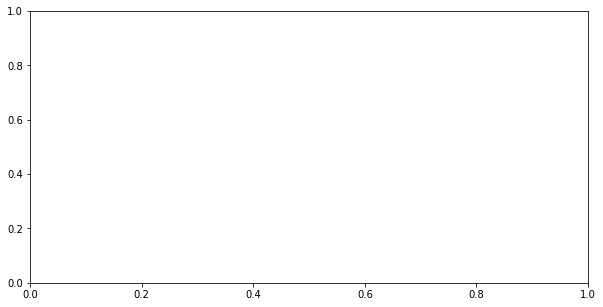

In [73]:
plt.rcParams['figure.figsize'] = (10, 5)
fig = plt.subplots()

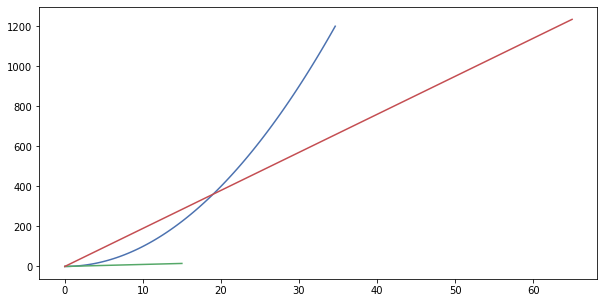

In [66]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('seaborn-deep')
x_data = []
y_data = []
for i in np.arange(0,35,0.35):
    x_data.append(i)
    y_data.append(i**2)
X = np.linspace(0,15,500)
Y = X
X1 = np.linspace(0,65,9000)
Y1 = X1 * 19
fig, ax = plt.subplots()
plt.plot(x_data,y_data,X,Y,X1,Y1)

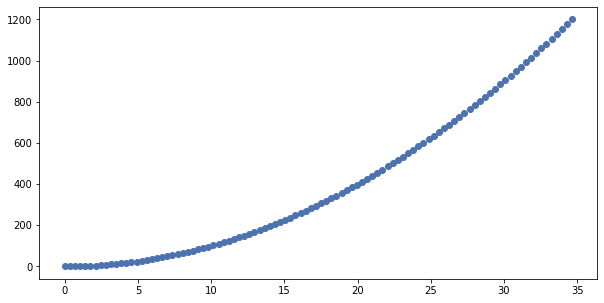

In [67]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.scatter(x_data,y_data)

In [74]:
mean = np.mean(x_data)
MAE = [np.abs(real - mean) for real in x_data]
MSE = [np.square(real - mean) for real in x_data]

x_data = np.random.random(19)
y_data = x_data ** 2

y_hat = (yhat(x_data, y_data))

head = np.column_stack((x_data, y_data, y_hat, MAE, MSE))
answer = pd.DataFrame(head, columns=('X', 'Y', 'Y_Hat', 'MAE', 'MSE'))
print(answer)

           X         Y     Y_Hat       MAE       MSE
0   0.405917  0.164768  0.232186  0.068143  0.004644
1   0.206537  0.042657  0.054844  0.265193  0.070327
2   0.629434  0.396187  0.430998  0.241078  0.058118
3   0.545944  0.298055  0.356736  0.321263  0.103210
4   0.263958  0.069674  0.105918  0.167393  0.028021
5   0.027482  0.000755 -0.104420  0.137682  0.018956
6   0.620847  0.385451  0.423360  0.271499  0.073712
7   0.004856  0.000024 -0.124546  0.492455  0.242512
8   0.862825  0.744467  0.638593  0.265694  0.070594
9   0.438992  0.192714  0.261606  0.494122  0.244156
10  0.550465  0.303011  0.360757  0.090300  0.008154
11  0.134811  0.018174 -0.008954  0.431645  0.186318
12  0.658163  0.433178  0.456551  0.434463  0.188758
13  0.961509  0.924499  0.726369  0.249673  0.062337
14  0.631232  0.398454  0.432597  0.400103  0.160083
15  0.354964  0.125999  0.186865  0.515553  0.265795
16  0.608420  0.370175  0.412307  0.225822  0.050995
17  0.140326  0.019691 -0.004048  0.412755  0.

In [71]:
answer.to_csv('data.csv')